# Test 5 {#sec-test_5}
This test circuit is simular to test 4, but with the addition of inductors and capacitors. This circuit has 26 branches, 13 nodes, 18 passive components, including 2 inductors, 2 capacitors, 4 independednt sources and 4 dependent sources. V1 and V2 are zero volt sources used to measure current through their branches. V4 is the independent voltage source and is set to 20 volts DC when calculating the DC operating point and to 20 volts AC for the AC analysis. 

![test circuit](test_5.png){#fig-test_5}

```
* test_5.asc
V4 1 2 AC 20
I2 3 4 5
F1 5 9 V1 5
E1 12 3 10 1 3
G1 7 10 9 4 2
H1 2 12 V2 2
R3 5 1 10
R4 3 7 1
R9 4 8 9
R10 8 0 10
R13 9 11 7
R14 10 9 10
R2 3 5 5
R7 8 7 6
R11 10 9 5
R12 0 10 9
R16 12 11 10
R8 3 8 5
R17 2 6 8
V1 6 3 0
V2 13 5 0
R18 12 13 4
C1 7 1 2
C2 1 9 5
L1 1 5 3 Rser=0
L2 0 11 8 Rser=0
.op
* ;.ac dec 100 .01 1
.backanno
.end
```


In [1]:
#import os
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## Load the net list

In [2]:
net_list = '''
V4 1 2 20
I2 3 4 5
F1 5 9 V1 5
E1 12 3 10 1 3
G1 7 10 9 4 2
H1 2 12 V2 2
R3 5 1 10
R4 3 7 1
R9 4 8 9
R10 8 0 10
R13 9 11 7
R14 10 9 10
R2 3 5 5
R7 8 7 6
R11 10 9 5
R12 0 10 9
R16 12 11 10
R8 3 8 5
R17 2 6 8
V1 6 3 0
V2 13 5 0
R18 12 13 4
C1 7 1 2
C2 1 9 5
L1 1 5 3 
L2 0 11 8 
'''

## Call the symbolic modified nodal analysis function

In [3]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(net_list)

Display the equations

In [4]:
# reform X and Z into Matrix type for printing
Xp = Matrix(X)
Zp = Matrix(Z)
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*Xp)[i:i+1][0],Zp[i])))

Markdown(temp)

$- C_{1} s v_{7} - C_{2} s v_{9} + I_{L1} + I_{V4} + v_{1} \left(C_{1} s + C_{2} s + \frac{1}{R_{3}}\right) - \frac{v_{5}}{R_{3}} = 0$<br>$I_{H1} - I_{V4} + \frac{v_{2}}{R_{17}} - \frac{v_{6}}{R_{17}} = 0$<br>$- I_{Ea1} - I_{V1} + v_{3} \cdot \left(\frac{1}{R_{8}} + \frac{1}{R_{4}} + \frac{1}{R_{2}}\right) - \frac{v_{8}}{R_{8}} - \frac{v_{7}}{R_{4}} - \frac{v_{5}}{R_{2}} = - I_{2}$<br>$\frac{v_{4}}{R_{9}} - \frac{v_{8}}{R_{9}} = I_{2}$<br>$I_{F1} - I_{L1} - I_{V2} + v_{5} \cdot \left(\frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{1}}{R_{3}} - \frac{v_{3}}{R_{2}} = 0$<br>$I_{V1} - \frac{v_{2}}{R_{17}} + \frac{v_{6}}{R_{17}} = 0$<br>$- C_{1} s v_{1} - g_{1} v_{4} + g_{1} v_{9} + v_{7} \left(C_{1} s + \frac{1}{R_{7}} + \frac{1}{R_{4}}\right) - \frac{v_{8}}{R_{7}} - \frac{v_{3}}{R_{4}} = 0$<br>$v_{8} \cdot \left(\frac{1}{R_{9}} + \frac{1}{R_{8}} + \frac{1}{R_{7}} + \frac{1}{R_{10}}\right) - \frac{v_{4}}{R_{9}} - \frac{v_{3}}{R_{8}} - \frac{v_{7}}{R_{7}} = 0$<br>$- C_{2} s v_{1} - I_{F1} + v_{10} \left(- \frac{1}{R_{14}} - \frac{1}{R_{11}}\right) + v_{9} \left(C_{2} s + \frac{1}{R_{14}} + \frac{1}{R_{13}} + \frac{1}{R_{11}}\right) - \frac{v_{11}}{R_{13}} = 0$<br>$g_{1} v_{4} + v_{10} \cdot \left(\frac{1}{R_{14}} + \frac{1}{R_{12}} + \frac{1}{R_{11}}\right) + v_{9} \left(- g_{1} - \frac{1}{R_{14}} - \frac{1}{R_{11}}\right) = 0$<br>$- I_{L2} + v_{11} \cdot \left(\frac{1}{R_{16}} + \frac{1}{R_{13}}\right) - \frac{v_{12}}{R_{16}} - \frac{v_{9}}{R_{13}} = 0$<br>$I_{Ea1} - I_{H1} + v_{12} \cdot \left(\frac{1}{R_{18}} + \frac{1}{R_{16}}\right) - \frac{v_{13}}{R_{18}} - \frac{v_{11}}{R_{16}} = 0$<br>$I_{V2} - \frac{v_{12}}{R_{18}} + \frac{v_{13}}{R_{18}} = 0$<br>$v_{1} - v_{2} = V_{4}$<br>$- v_{3} + v_{6} = V_{1}$<br>$v_{13} - v_{5} = V_{2}$<br>$I_{F1} - I_{V1} f_{1} = 0$<br>$ea_{1} v_{1} - ea_{1} v_{10} + v_{12} - v_{3} = 0$<br>$- I_{V2} h_{1} - v_{12} + v_{2} = 0$<br>$- I_{L1} L_{1} s + v_{1} - v_{5} = 0$<br>$- I_{L2} L_{2} s - v_{11} = 0$<br>

### Netlist statistics

In [5]:
print(report)

Net list report
number of lines in netlist: 26
number of branches: 26
number of nodes: 13
number of unknown currents: 8
number of RLC (passive components): 18
number of inductors: 2
number of independent voltage sources: 3
number of independent current sources: 1
number of op amps: 0
number of E - VCVS: 1
number of G - VCCS: 1
number of F - CCCS: 1
number of H - CCVS: 1
number of K - Coupled inductors: 0



### Connectivity Matrix

In [6]:
A

⎡              1                             -1                               
⎢C₁⋅s + C₂⋅s + ──   0        0         0     ───     0       -C₁⋅s            
⎢              R₃                             R₃                              
⎢                                                                             
⎢                   1                               -1                        
⎢       0          ───       0         0      0     ───        0              
⎢                  R₁₇                              R₁₇                       
⎢                                                                             
⎢                       1    1    1          -1               -1              
⎢       0           0   ── + ── + ──   0     ───     0        ───             
⎢                       R₈   R₄   R₂          R₂               R₄             
⎢                                                                             
⎢                                     1             

### Unknown voltages and currents

In [7]:
X

### Known voltages and currents

In [8]:
Z

### Network dataframe

In [9]:
network_df

,element,p node,n node,cp node,cn node,Vout,value,Vname,Lname1,Lname2
0,V4,1,2,NaN,NaN,NaN,20.0,NaN,NaN,NaN
1,V1,6,3,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,V2,13,5,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,I2,3,4,NaN,NaN,NaN,5.0,NaN,NaN,NaN
4,F1,5,9,NaN,NaN,NaN,5.0,V1,NaN,NaN
5,Ea1,12,3,10,1,NaN,3.0,NaN,NaN,NaN
6,G1,7,10,9,4,NaN,2.0,NaN,NaN,NaN
7,H1,2,12,NaN,NaN,NaN,2.0,V2,NaN,NaN
8,R3,5,1,NaN,NaN,NaN,10.0,NaN,NaN,NaN
9,R4,3,7,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### Unknown current dataframe

In [10]:
i_unk_df

,element,p node,n node
0,V4,1,2
1,V1,6,3
2,V2,13,5
3,F1,5,9
4,Ea1,12,3
5,H1,2,12
6,L1,1,5
7,L2,0,11


### Build the network equation matrix

In [11]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)
NE_sym

⎡                                           ⎛              1 ⎞   v₅     ⎤     
⎢     -C₁⋅s⋅v₇ - C₂⋅s⋅v₉ + I_L1 + I_V4 + v₁⋅⎜C₁⋅s + C₂⋅s + ──⎟ - ──     ⎥     
⎢                                           ⎝              R₃⎠   R₃     ⎥     
⎢                                                                       ⎥     
⎢                                       v₂    v₆                        ⎥     
⎢                        I_H1 - I_V4 + ─── - ───                        ⎥     
⎢                                      R₁₇   R₁₇                        ⎥     
⎢                                                                       ⎥     
⎢                              ⎛1    1    1 ⎞   v₈   v₇   v₅            ⎥     
⎢           -I_Ea1 - I_V1 + v₃⋅⎜── + ── + ──⎟ - ── - ── - ──            ⎥     
⎢                              ⎝R₈   R₄   R₂⎠   R₈   R₄   R₂            ⎥     
⎢                                                                       ⎥     
⎢                                v₄   v₈            

In [12]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

## Symbolic solution

In [13]:
#U_sym = solve(NE_sym,X)

Display the symbolic solution

In [14]:
#temp = ''
#for i in U_sym.keys():
#    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

#Markdown(temp)

## Construct a dictionary of element values

In [15]:
element_value_keys = []
element_value_values = []

for i in range(len(network_df)):
    if network_df.iloc[i]['element'][0] == 'F' or network_df.iloc[i]['element'][0] == 'E' or network_df.iloc[i]['element'][0] == 'G' or network_df.iloc[i]['element'][0] == 'H':
        element_value_keys.append(var(network_df.iloc[i]['element'].lower()))
        element_value_values.append(network_df.iloc[i]['value'])
    else:
        element_value_keys.append(var(network_df.iloc[i]['element']))
        element_value_values.append(network_df.iloc[i]['value'])

element_values = dict(zip(element_value_keys, element_value_values))

element_values

## DC operating point
Both V4 and I2 are active.

In [16]:
NE = NE_sym.subs(element_values)
NE_dc = NE.subs({s:0})
NE_dc

⎡                       I_L1 + I_V4 + 0.1⋅v₁ - 0.1⋅v₅                        ⎤
⎢                                                                            ⎥
⎢                     I_H1 - I_V4 + 0.125⋅v₂ - 0.125⋅v₆                      ⎥
⎢                                                                            ⎥
⎢               -I_Ea1 - I_V1 + 1.4⋅v₃ - 0.2⋅v₅ - v₇ - 0.2⋅v₈                ⎥
⎢                                                                            ⎥
⎢                0.111111111111111⋅v₄ - 0.111111111111111⋅v₈                 ⎥
⎢                                                                            ⎥
⎢               I_F1 - I_L1 - I_V2 - 0.1⋅v₁ - 0.2⋅v₃ + 0.3⋅v₅                ⎥
⎢                                                                            ⎥
⎢                         I_V1 - 0.125⋅v₂ + 0.125⋅v₆                         ⎥
⎢                                                                            ⎥
⎢     -v₃ - 2.0⋅v₄ + 1.16666666666667⋅v₇ - 0.1666666

In [17]:
U_dc = solve(NE_dc,X)

Display the numerical solution

Six significant digits are displayed so that results can be compared to LTSpice. 

In [18]:
table_header = ['unknown', 'mag']
table_row = []

for name, value in U_dc.items():
    table_row.append([str(name),float(value)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal'),tablefmt="simple",floatfmt=('5s','.6f')))

unknown           mag
---------  ----------
v1          -5.020059
v2         -25.020059
v3         -40.666907
v4          26.781121
v5          -5.020059
v6         -40.666907
v7         -32.212572
v8         -18.218879
v9          23.720095
v10          2.417779
v11          0.000000
v12        -18.353392
v13         -5.020059
I_V4       -20.241983
I_V1         1.955856
I_V2        -3.333333
I_F1         9.779280
I_Ea1      -17.029166
I_H1       -22.197839
I_L1        20.241983
I_L2        -1.553246


The node voltages and current through the sources are solved for. The Sympy generated solution matches the LTSpice results:
```
       --- Operating Point ---

V(1):	 -5.02006	 voltage
V(2):	 -25.0201	 voltage
V(3):	 -40.6669	 voltage
V(4):	 26.7811	 voltage
V(5):	 -5.02006	 voltage
V(9):	 23.7201	 voltage
V(12):	 -18.3534	 voltage
V(10):	 2.41778	 voltage
V(7):	 -32.2126	 voltage
V(8):	 -18.2189	 voltage
V(11):	 0	 voltage
V(6):	 -40.6669	 voltage
V(13):	 -5.02006	 voltage
I(C1):	 -5.4385e-11	 device_current
I(C2):	 -1.43701e-10	 device_current
I(F1):	 9.77928	 device_current
I(H1):	 -22.1978	 device_current
I(L1):	 20.242	 device_current
I(L2):	 -1.55325	 device_current
I(I2):	 5	 device_current
I(R3):	 -8.88178e-16	 device_current
I(R4):	 -8.45434	 device_current
I(R9):	 5	 device_current
I(R10):	 -1.82189	 device_current
I(R13):	 3.38859	 device_current
I(R14):	 -2.13023	 device_current
I(R2):	 -7.12937	 device_current
I(R7):	 2.33228	 device_current
I(R11):	 -4.26046	 device_current
I(R12):	 -0.268642	 device_current
I(R16):	 -1.83534	 device_current
I(R8):	 -4.48961	 device_current
I(R17):	 1.95586	 device_current
I(R18):	 -3.33333	 device_current
I(G1):	 -6.12205	 device_current
I(E1):	 -17.0292	 device_current
I(V4):	 -20.242	 device_current
I(V1):	 1.95586	 device_current
I(V2):	 -3.33333	 device_current
```
The results from LTSpice agree with the SymPy results.

### AC analysis
Solve equations for $\omega$ equal to 1 radian per second, s = 1j.

Need to set I2 = 0

In [19]:
element_values[I2] = 0
NE = NE_sym.subs(element_values)
NE_w1 = NE.subs({s:1j})
NE_w1  # display the equations

⎡             I_L1 + I_V4 + v₁⋅(0.1 + 7.0⋅ⅈ) - 0.1⋅v₅ - 2.0⋅ⅈ⋅v₇ - 5.0⋅ⅈ⋅v₉   
⎢                                                                             
⎢                           I_H1 - I_V4 + 0.125⋅v₂ - 0.125⋅v₆                 
⎢                                                                             
⎢                     -I_Ea1 - I_V1 + 1.4⋅v₃ - 0.2⋅v₅ - v₇ - 0.2⋅v₈           
⎢                                                                             
⎢                      0.111111111111111⋅v₄ - 0.111111111111111⋅v₈            
⎢                                                                             
⎢                     I_F1 - I_L1 - I_V2 - 0.1⋅v₁ - 0.2⋅v₃ + 0.3⋅v₅           
⎢                                                                             
⎢                              I_V1 - 0.125⋅v₂ + 0.125⋅v₆                     
⎢                                                                             
⎢-2.0⋅ⅈ⋅v₁ - v₃ - 2.0⋅v₄ + v₇⋅(1.16666666666667 + 2.

In [20]:
U_w1 = solve(NE_w1,X)

Display the numerical solution

Six significant digits are displayed so that results can be compared to LTSpice. 

In [21]:
table_header = ['unknown', 'mag','phase, deg']
table_row = []

for name, value in U_w1.items():
    table_row.append([str(name),float(abs(value)),float(arg(value)*180/np.pi)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal','decimal'),tablefmt="simple",floatfmt=('5s','.6f','.6f')))

unknown          mag    phase, deg
---------  ---------  ------------
v1          3.599764    -52.169011
v2         18.017879   -170.920917
v3          1.855665     65.635428
v4          1.903808      8.371520
v5         14.354390     47.295045
v6          1.855665     65.635428
v7          4.531708    -16.043028
v8          1.903808      8.371520
v9          1.498280    -10.433515
v10         3.010258   -107.783771
v11         2.426237   -163.488259
v12         8.767364    169.347366
v13        14.354390     47.295045
I_V4       10.838028   -177.106564
I_V1        2.387928   -166.271733
I_V2        5.102027   -154.058091
I_F1       11.939640   -166.271733
I_Ea1       3.858821    148.425320
I_H1        8.504523    179.867890
I_L1        5.120760    150.658972
I_L2        0.303280    -73.488259




```
       --- AC Analysis ---

frequency:	0.159155	Hz
V(1):	mag:    3.59976 phase:    -52.169° 	voltage
V(2):	mag:    18.0179 phase:   -170.921° 	voltage
V(3):	mag:    1.85567 phase:    65.6354° 	voltage
V(4):	mag:    1.90381 phase:    8.37152° 	voltage
V(5):	mag:    14.3544 phase:     47.295° 	voltage
V(9):	mag:    1.49828 phase:   -10.4335° 	voltage
V(12):	mag:    8.76736 phase:    169.347° 	voltage
V(10):	mag:    3.01026 phase:   -107.784° 	voltage
V(7):	mag:    4.53171 phase:    -16.043° 	voltage
V(8):	mag:    1.90381 phase:    8.37152° 	voltage
V(11):	mag:    2.42624 phase:   -163.488° 	voltage
V(6):	mag:    1.85567 phase:    65.6354° 	voltage
V(13):	mag:    14.3544 phase:     47.295° 	voltage
I(C1):	mag:    5.34483 phase:    126.532° 	device_current
I(C2):	mag:    13.3732 phase:    15.9359° 	device_current
I(F1):	mag:    11.9396 phase:   -166.272° 	device_current
I(H1):	mag:    8.50452 phase:    179.868° 	device_current
I(L1):	mag:    5.12076 phase:    150.659° 	device_current
I(L2):	mag:    0.30328 phase:   -73.4883° 	device_current
I(I2):	mag:          0 phase:          0° 	device_current
I(R3):	mag:    1.53623 phase:     60.659° 	device_current
I(R4):	mag:    4.64174 phase:    140.656° 	device_current
I(R9):	mag:          0 phase:          0° 	device_current
I(R10):	mag:   0.190381 phase:    8.37152° 	device_current
I(R13):	mag:   0.546091 phase:    6.28131° 	device_current
I(R14):	mag:   0.352995 phase:   -132.679° 	device_current
I(R2):	mag:     2.5213 phase:    -135.36° 	device_current
I(R7):	mag:   0.484448 phase:     148.25° 	device_current
I(R11):	mag:   0.705989 phase:   -132.679° 	device_current
I(R12):	mag:   0.334473 phase:    72.2162° 	device_current
I(R16):	mag:   0.670093 phase:    159.833° 	device_current
I(R8):	mag:   0.360393 phase:    128.347° 	device_current
I(R17):	mag:    2.38793 phase:   -166.272° 	device_current
I(R18):	mag:    5.10203 phase:   -154.058° 	device_current
I(G1):	mag:    1.36963 phase:   -126.779° 	device_current
I(E1):	mag:    3.85882 phase:    148.425° 	device_current
I(V4):	mag:     10.838 phase:   -177.107° 	device_current
I(V1):	mag:    2.38793 phase:   -166.272° 	device_current
I(V2):	mag:    5.10203 phase:   -154.058° 	device_current

```

### AC Sweep
Looking at node 5 voltage and comparing the results with those obtained from LTSpice. The frequency sweep is from 0.01 Hz to 1 Hz.

In [22]:
NE = NE_sym.subs(element_values)
NE

⎡             I_L1 + I_V4 - 2.0⋅s⋅v₇ - 5.0⋅s⋅v₉ + v₁⋅(7.0⋅s + 0.1) - 0.1⋅v₅   
⎢                                                                             
⎢                           I_H1 - I_V4 + 0.125⋅v₂ - 0.125⋅v₆                 
⎢                                                                             
⎢                     -I_Ea1 - I_V1 + 1.4⋅v₃ - 0.2⋅v₅ - v₇ - 0.2⋅v₈           
⎢                                                                             
⎢                      0.111111111111111⋅v₄ - 0.111111111111111⋅v₈            
⎢                                                                             
⎢                     I_F1 - I_L1 - I_V2 - 0.1⋅v₁ - 0.2⋅v₃ + 0.3⋅v₅           
⎢                                                                             
⎢                              I_V1 - 0.125⋅v₂ + 0.125⋅v₆                     
⎢                                                                             
⎢-2.0⋅s⋅v₁ - v₃ - 2.0⋅v₄ + v₇⋅(2.0⋅s + 1.16666666666

In [23]:
U_ac = solve(NE,X)

### Plot the voltage at node 5

In [24]:
H = U_ac[v5]

In [25]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b)

In [31]:
#x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 200, endpoint=True)
x = np.logspace(-2, 0, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

Load the csv file of node 5 voltage over the sweep range and plot along with the results obtained from SymPy.

In [32]:
fn = 'test_5.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',')

In [33]:
# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

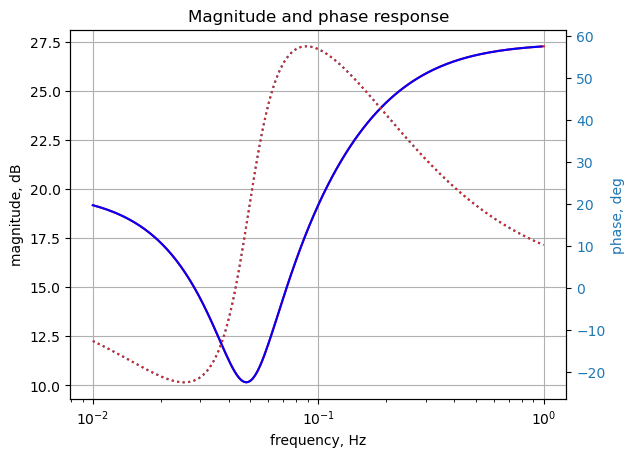

In [36]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage)),'-r')    # Bode magnitude plot
plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency, np.angle(voltage)*180/np.pi,':',color=color)  # Bode phase plot
plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

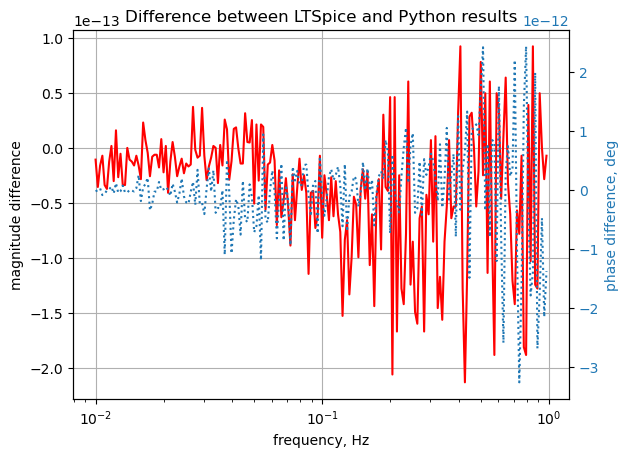

In [35]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude difference')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency[0:-1], np.abs(voltage[0:-1])-10**(mag/20),'-r')    # Bode magnitude plot
#plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency[0:-1], np.unwrap(2*np.angle(voltage[0:-1])/2) *180/np.pi - phase,':',color=color)  # Bode phase plot
#plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase difference, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Difference between LTSpice and Python results')
plt.show()

The SymPy and LTSpice results overlay each other. 